In [1]:
#visitar: https://www.machinelearningplus.com/machine-learning/principal-components-analysis-pca-better-explained/
# Load Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pd.set_option('max_rows', 500)
pd.set_option('max_columns', 500)
np.set_printoptions(suppress=True)
%matplotlib inline

In [2]:
df = pd.read_csv('sugarcane_spatial_cluster.csv')

In [3]:
numerics = ['longitude', 'latitude', 'area','edad','RSD',
       'LSD', 'incidencia_RSD', 'incidencia_LSD', 'prevalencia_RSD',
       'prevalencia_LSD','NDVI', 'RH2M', 'PRECTOTCORR', 'WS2M', 'PAR', 'T2M',
       'T2M_MAX', 'T2M_MIN', 'densidad_aparente_0-30cm_mean',
       'intercambio_catiónico_0-30cm_mean', 'fraccion_gruesa_0-30cm_mean',
       'arcillas_0-30cm_mean', 'nitrogeno_0-30cm_mean', 'ph_0-30cm_mean',
       'arena_0-30cm_mean', 'limo_0-30cm_mean', 'carbono_organico_0-30cm_mean']
categories = ['year', 'month', 'ingenio', 'corte', 'lote_comercial', 'lote_semillero','cluster']
cardinal = ['hacienda','variedad']

In [4]:
x1 = df[['incidencia_RSD','longitude', 'latitude', 'area','edad',
       'incidencia_LSD', 
       'NDVI', 'RH2M', 'PRECTOTCORR', 'WS2M', 'PAR', 'T2M',
       'T2M_MAX', 'T2M_MIN', 'densidad_aparente_0-30cm_mean',
       'intercambio_catiónico_0-30cm_mean', 'fraccion_gruesa_0-30cm_mean',
       'arcillas_0-30cm_mean', 'nitrogeno_0-30cm_mean', 'ph_0-30cm_mean',
       'arena_0-30cm_mean', 'limo_0-30cm_mean', 'carbono_organico_0-30cm_mean', 'cluster']]
x2 = df[['incidencia_LSD','longitude', 'latitude', 'area','edad',
       'incidencia_RSD', 
       'NDVI', 'RH2M', 'PRECTOTCORR', 'WS2M', 'PAR', 'T2M',
       'T2M_MAX', 'T2M_MIN', 'densidad_aparente_0-30cm_mean',
       'intercambio_catiónico_0-30cm_mean', 'fraccion_gruesa_0-30cm_mean',
       'arcillas_0-30cm_mean', 'nitrogeno_0-30cm_mean', 'ph_0-30cm_mean',
       'arena_0-30cm_mean', 'limo_0-30cm_mean', 'carbono_organico_0-30cm_mean','cluster']]

C:\ProgramData\Anaconda3\envs\models_tesis\lib\site-packages\pandas\plotting\_matplotlib\tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


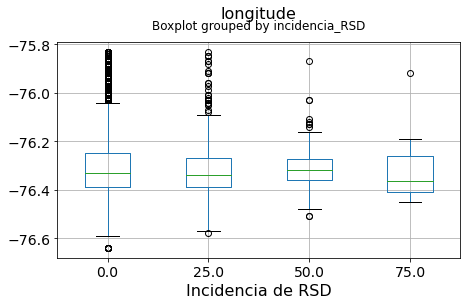

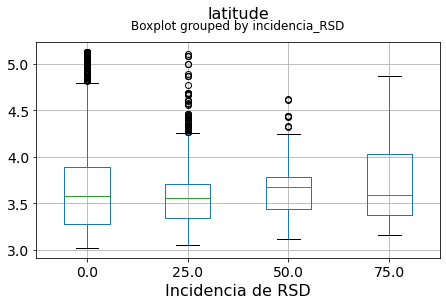

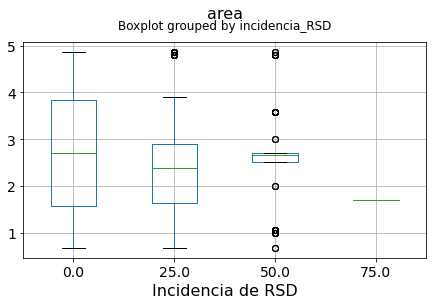

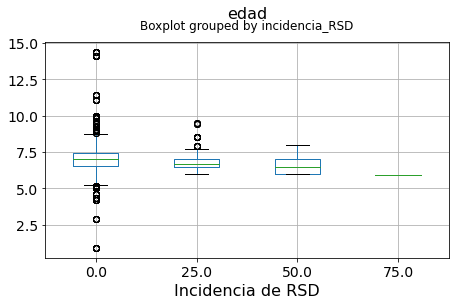

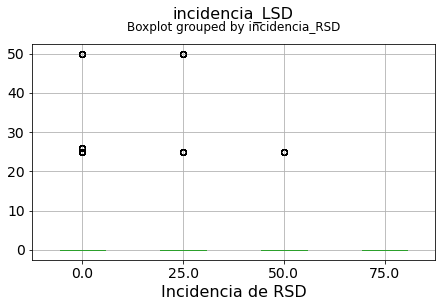

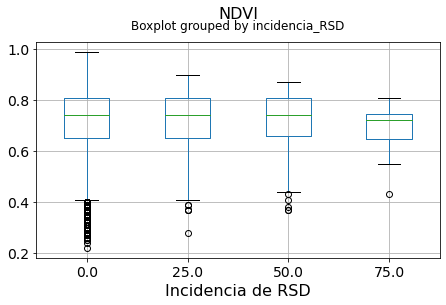

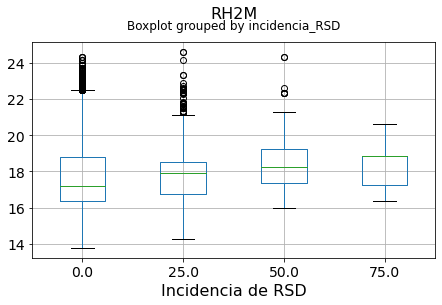

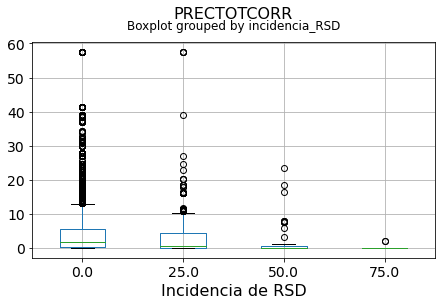

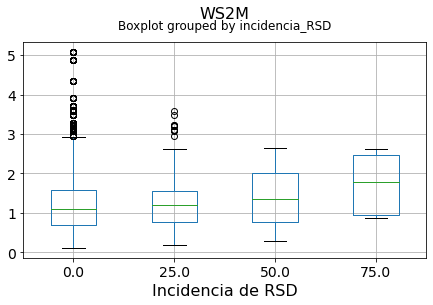

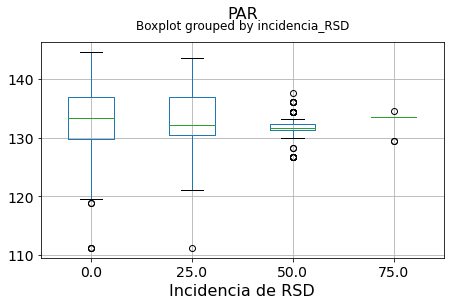

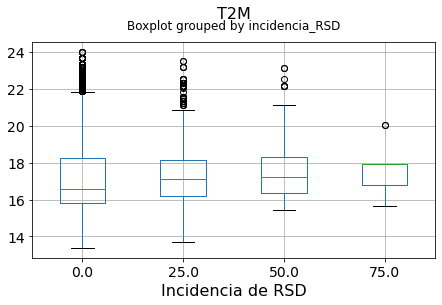

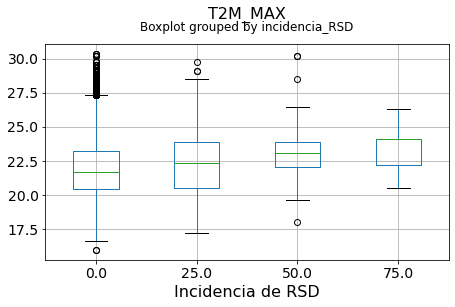

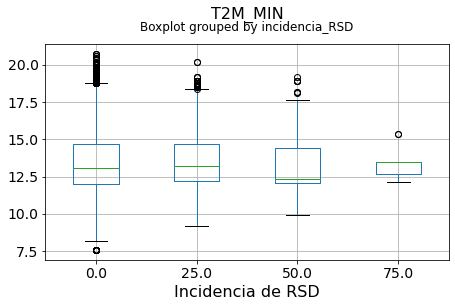

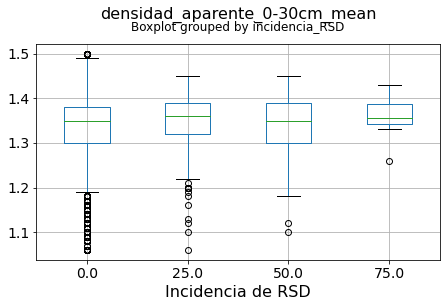

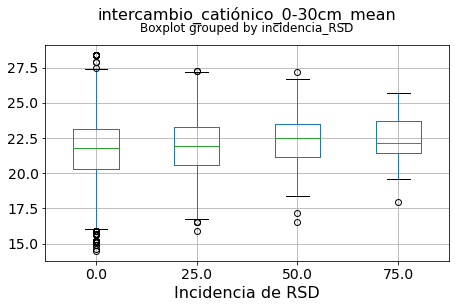

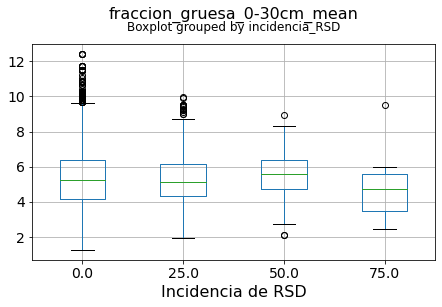

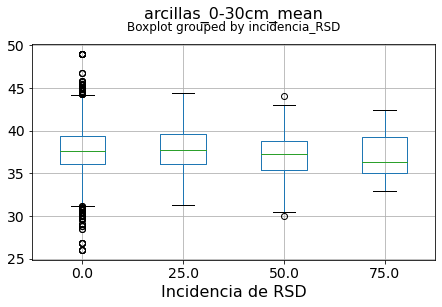

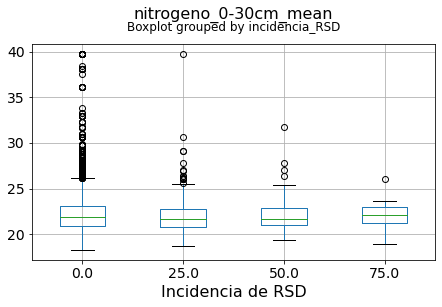

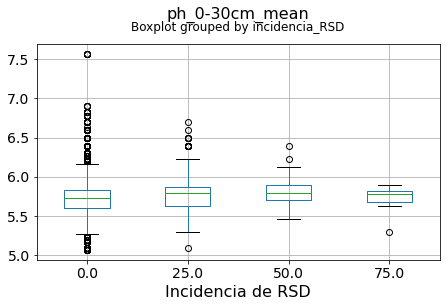

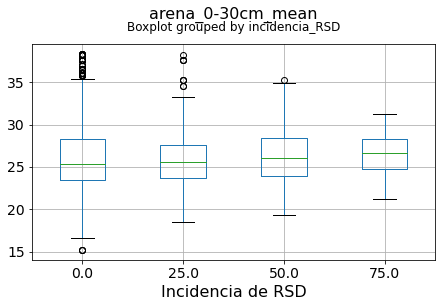

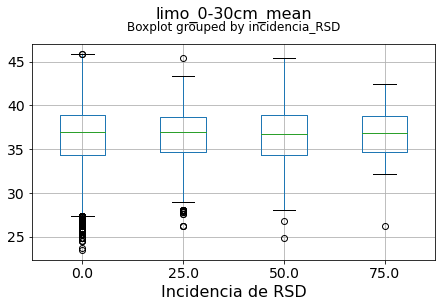

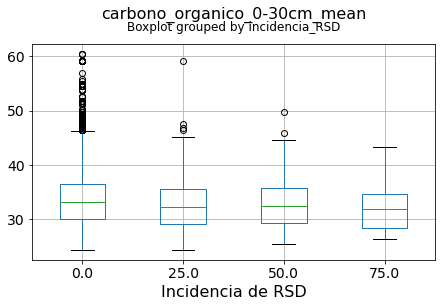

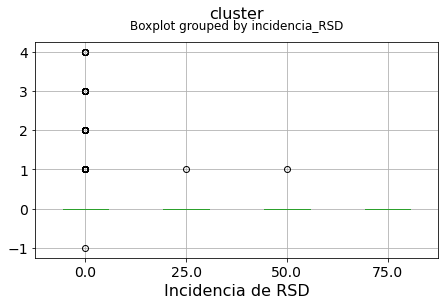

In [5]:
for c in x1.columns[1:]:
    df.boxplot(c,by='incidencia_RSD',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Incidencia de RSD", fontsize=16)

C:\ProgramData\Anaconda3\envs\models_tesis\lib\site-packages\pandas\plotting\_matplotlib\tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


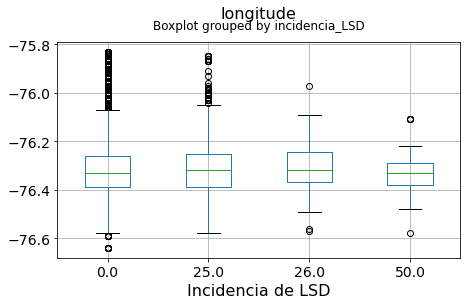

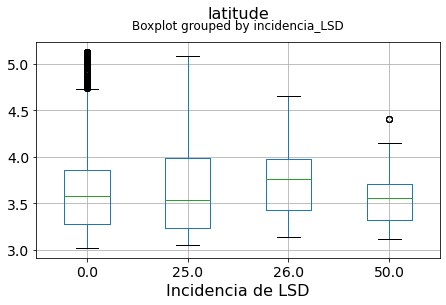

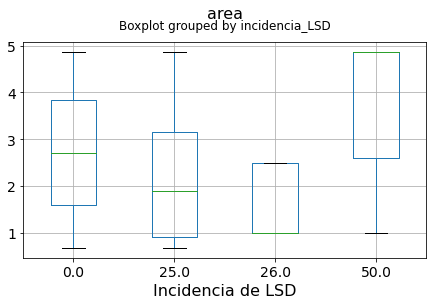

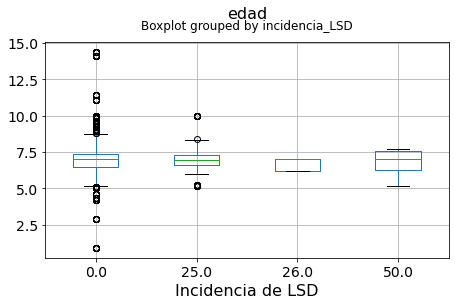

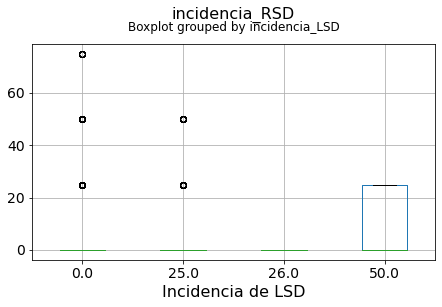

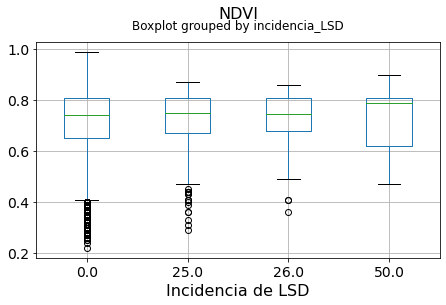

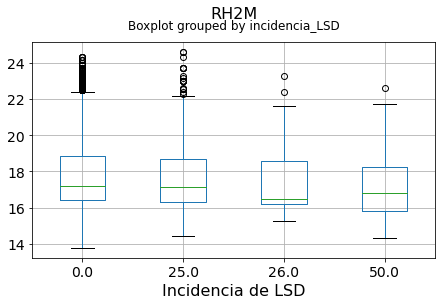

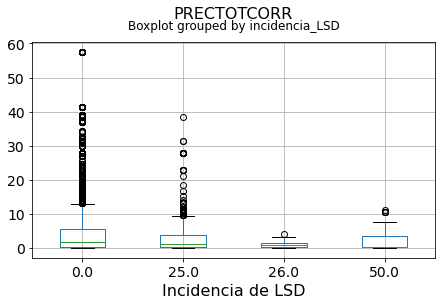

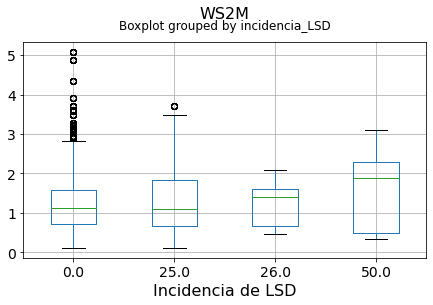

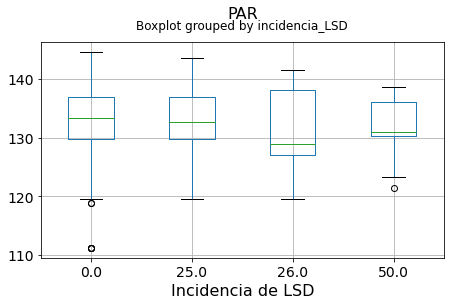

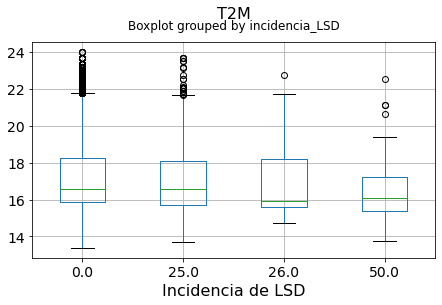

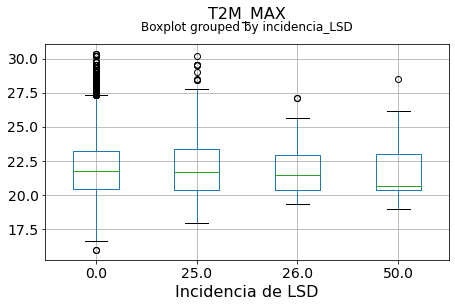

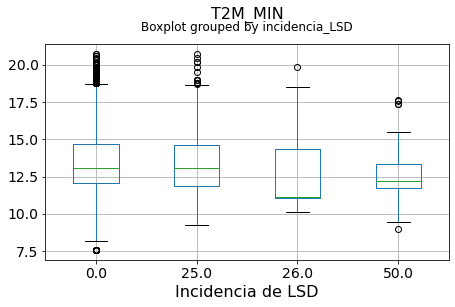

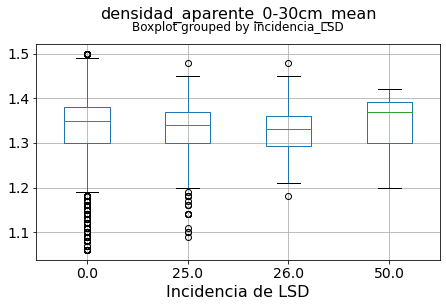

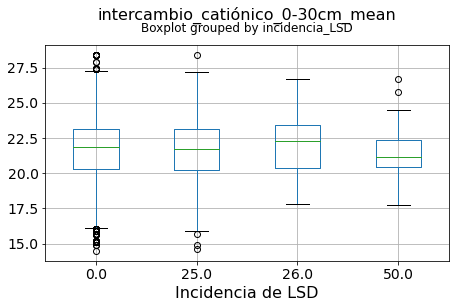

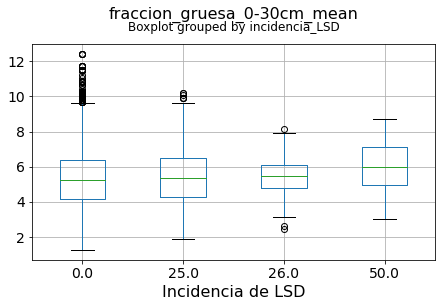

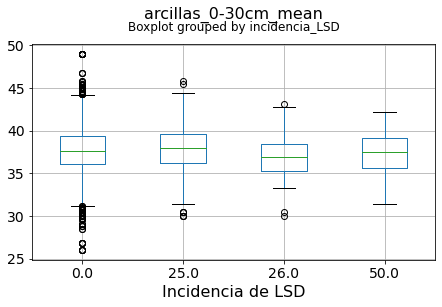

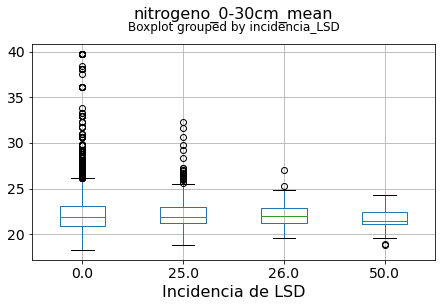

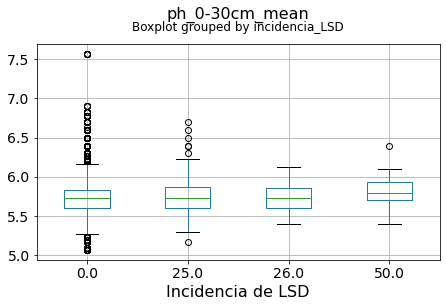

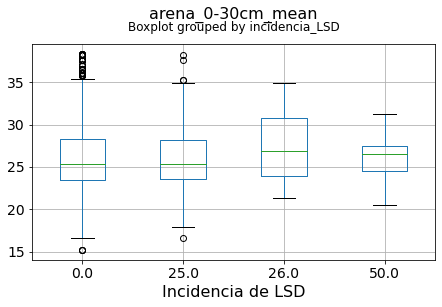

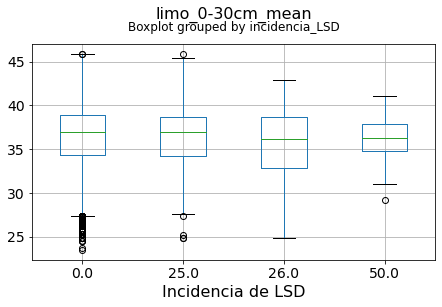

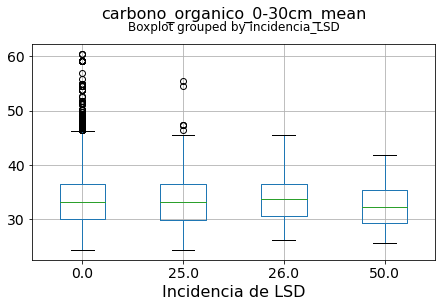

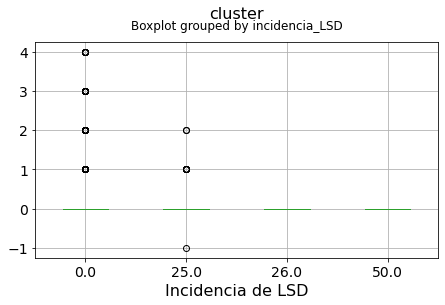

In [6]:
for c in x2.columns[1:]:
    df.boxplot(c,by='incidencia_LSD',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Incidencia de LSD", fontsize=16)

In [7]:
df.corr()

,year,month,longitude,latitude,ingenio,area,edad,corte,lote_comercial,lote_semillero,RSD,LSD,incidencia_RSD,incidencia_LSD,prevalencia_RSD,prevalencia_LSD,NDVI,RH2M,PRECTOTCORR,WS2M,PAR,T2M,T2M_MAX,T2M_MIN,densidad_aparente_0-30cm_mean,intercambio_catiónico_0-30cm_mean,fraccion_gruesa_0-30cm_mean,arcillas_0-30cm_mean,nitrogeno_0-30cm_mean,ph_0-30cm_mean,arena_0-30cm_mean,limo_0-30cm_mean,carbono_organico_0-30cm_mean,cluster
year,1.000000,-0.210901,-0.056667,-0.038751,-0.144745,0.180804,0.148384,-0.170401,0.162896,-0.160941,-0.024750,-0.131744,-0.024750,-0.131744,-0.027049,-0.120438,-0.080209,-0.013047,0.151281,-0.094240,0.053851,-0.004771,-0.072815,0.062710,0.042203,0.054713,0.010180,-0.066635,-0.024029,0.043005,0.012352,0.034141,-0.042934,-0.023930
month,-0.210901,1.000000,0.019040,0.001051,-0.018424,-0.053391,0.020877,-0.036042,-0.010717,0.012810,-0.038811,-0.033666,-0.038811,-0.033666,-0.027150,-0.024600,0.031783,-0.027791,0.050723,-0.048690,0.150822,-0.023311,-0.036765,-0.001667,-0.018447,-0.020954,0.003252,-0.002660,0.000691,0.012006,-0.001867,0.003871,-0.007915,0.002616
longitude,-0.056667,0.019040,1.000000,0.837732,0.045885,0.093185,0.000442,0.074469,0.066276,-0.066424,-0.020032,-0.001655,-0.020032,-0.001655,-0.007779,-0.019484,0.039388,0.020734,0.009027,-0.012622,-0.014564,0.029802,0.011121,0.037965,-0.508325,-0.225303,0.337170,-0.070964,0.327740,-0.191705,0.400966,-0.357225,0.285966,0.153359
latitude,-0.038751,0.001051,0.837732,1.000000,0.070692,0.088237,-0.001135,0.067381,0.062205,-0.062267,-0.011446,-0.006251,-0.011446,-0.006251,-0.000698,-0.022479,0.022439,0.051353,0.008261,-0.014062,-0.020528,0.059500,0.042094,0.061179,-0.350363,-0.167622,0.256638,-0.157927,0.288414,-0.276512,0.426320,-0.322340,0.394880,0.081637
ingenio,-0.144745,-0.018424,0.045885,0.070692,1.000000,0.011278,-0.078008,0.208813,-0.001936,0.001367,-0.061676,-0.011163,-0.061676,-0.011163,-0.051113,-0.007485,0.050591,-0.003443,0.007652,0.011062,-0.052661,-0.013500,0.002422,-0.025165,-0.075952,-0.048383,-0.036839,0.027925,0.036791,-0.132013,0.081151,-0.102139,0.062115,0.036500
area,0.180804,-0.053391,0.093185,0.088237,0.011278,1.000000,0.107451,-0.135758,0.520955,-0.520167,-0.034169,-0.051339,-0.034169,-0.051339,-0.097273,-0.145506,0.000429,0.009994,-0.008476,-0.001843,-0.043962,0.016212,-0.014987,0.044271,-0.119057,0.005609,0.131029,-0.057849,0.098509,-0.049807,0.051266,-0.011559,0.078082,0.024374
edad,0.148384,0.020877,0.000442,-0.001135,-0.078008,0.107451,1.000000,-0.141139,0.187318,-0.185663,-0.064728,-0.025574,-0.064728,-0.025574,-0.060707,-0.013573,0.025147,0.011122,0.012500,-0.083980,-0.031113,0.016041,-0.010687,0.043519,-0.026246,0.013683,0.050320,-0.035791,0.007135,0.004298,0.015453,0.009458,-0.005968,-0.022857
corte,-0.170401,-0.036042,0.074469,0.067381,0.208813,-0.135758,-0.141139,1.000000,-0.127408,0.127191,0.018452,0.026223,0.018452,0.026223,0.013897,0.008970,0.001150,-0.007903,0.018755,0.059139,0.019788,-0.012476,0.014307,-0.039659,-0.042837,-0.050825,-0.054865,0.057619,0.007338,-0.081918,-0.012006,-0.028326,0.057185,0.023215
lote_comercial,0.162896,-0.010717,0.066276,0.062205,-0.001936,0.520955,0.187318,-0.127408,1.000000,-0.997227,-0.027880,-0.014181,-0.027880,-0.014181,-0.050830,-0.043871,0.019232,0.033755,-0.008286,-0.016386,-0.015403,0.026913,0.010026,0.048576,-0.077821,-0.002790,0.096454,-0.035332,0.061308,-0.049252,0.011887,0.012764,0.051377,-0.006487
lote_semillero,-0.160941,0.012810,-0.066424,-0.062267,0.001367,-0.520167,-0.185663,0.127191,-0.997227,1.000000,0.027845,0.014143,0.027845,0.014143,0.050802,0.043842,-0.019851,-0.032824,0.008154,0.014967,0.017115,-0.025995,-0.009326,-0.047585,0.078298,0.003779,-0.095476,0.034935,-0.061053,0.049536,-0.012534,-0.011827,-0.051832,0.006472


Text(0.5, 1.0, 'Correlation between different fearures')

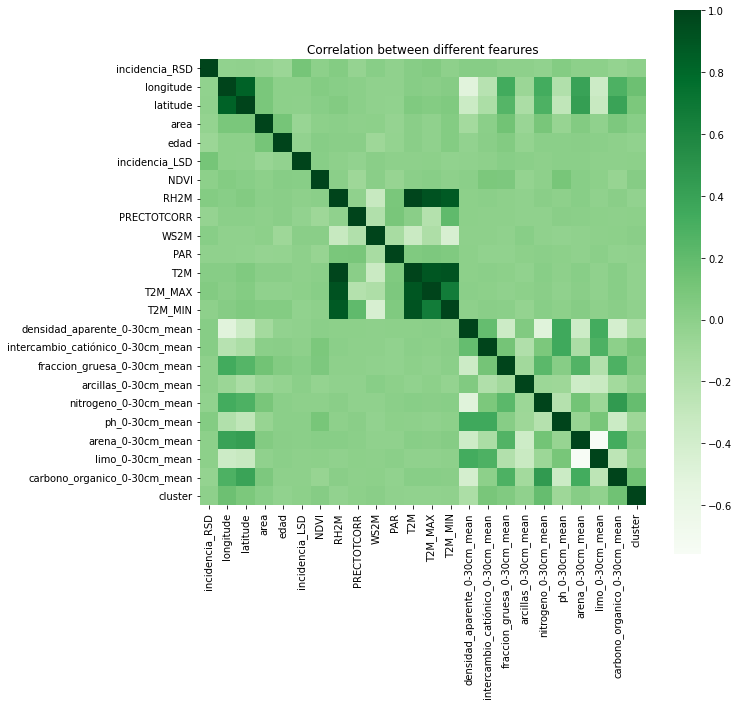

In [8]:
correlation = x1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,cmap='Greens')

plt.title('Correlation between different fearures')

Text(0.5, 1.0, 'Correlation between different fearures')

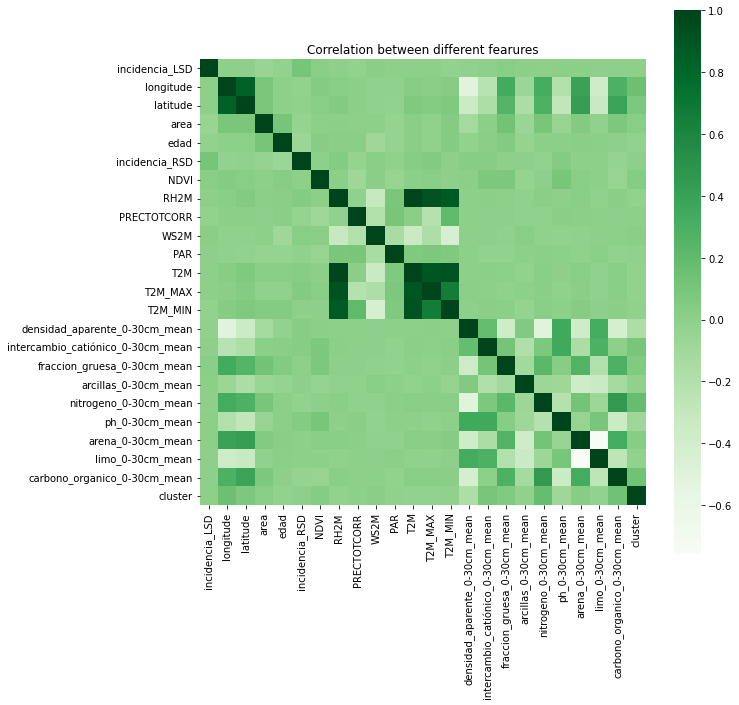

In [9]:
correlation = x2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,cmap='Greens')

plt.title('Correlation between different fearures')

In [10]:
cluster_x1 = x1.groupby('cluster').mean()
cluster_x1

,incidencia_RSD,longitude,latitude,area,edad,incidencia_LSD,NDVI,RH2M,PRECTOTCORR,WS2M,PAR,T2M,T2M_MAX,T2M_MIN,densidad_aparente_0-30cm_mean,intercambio_catiónico_0-30cm_mean,fraccion_gruesa_0-30cm_mean,arcillas_0-30cm_mean,nitrogeno_0-30cm_mean,ph_0-30cm_mean,arena_0-30cm_mean,limo_0-30cm_mean,carbono_organico_0-30cm_mean
cluster,,,,,,,,,,,,,,,,,,,,,,,
-1,0.000000,-76.120000,4.130000,3.150000,6.600000,25.000000,0.640000,17.630000,0.220000,1.910000,132.380000,16.740000,22.890000,12.090000,1.140000,25.500000,5.530000,37.270000,22.460000,5.600000,27.230000,35.430000,36.770000
0,1.028757,-76.305048,3.658587,2.706708,7.031963,0.914407,0.708688,17.752167,4.179310,1.241891,133.222610,17.204883,22.055416,13.589327,1.339080,21.659706,5.363724,37.686835,22.157419,5.732533,25.867133,36.445626,33.560473
1,0.852273,-75.864205,4.342841,3.225341,6.670795,1.988636,0.750114,17.000682,5.627159,1.296477,133.125909,16.442500,21.124659,12.945227,1.133636,24.907727,6.731023,37.519091,26.021364,5.488864,25.962045,36.531705,41.606364
2,0.000000,-75.983143,4.222286,2.971143,6.648571,1.428571,0.761714,17.339429,2.904571,1.486286,131.271714,17.019429,21.833429,13.466286,1.208000,23.046286,7.715143,34.948286,29.797429,5.517429,27.262286,37.755714,46.045714
3,0.000000,-75.990000,4.360000,2.630556,6.633333,0.000000,0.782778,17.362778,4.098333,1.280000,133.678333,16.863889,21.592778,13.313889,1.350000,25.230000,5.070000,39.270000,25.290000,5.600000,28.270000,32.470000,35.370000
4,0.000000,-76.640000,3.115714,4.414286,7.631429,0.000000,0.717143,16.397143,4.147143,1.757143,130.047143,15.995714,20.444286,12.704286,1.088571,25.592857,5.891429,37.707143,23.737143,5.365714,30.708571,31.584286,50.580000


In [11]:
cluster_x2 = x2.groupby('cluster').mean()
cluster_x2

,incidencia_LSD,longitude,latitude,area,edad,incidencia_RSD,NDVI,RH2M,PRECTOTCORR,WS2M,PAR,T2M,T2M_MAX,T2M_MIN,densidad_aparente_0-30cm_mean,intercambio_catiónico_0-30cm_mean,fraccion_gruesa_0-30cm_mean,arcillas_0-30cm_mean,nitrogeno_0-30cm_mean,ph_0-30cm_mean,arena_0-30cm_mean,limo_0-30cm_mean,carbono_organico_0-30cm_mean
cluster,,,,,,,,,,,,,,,,,,,,,,,
-1,25.000000,-76.120000,4.130000,3.150000,6.600000,0.000000,0.640000,17.630000,0.220000,1.910000,132.380000,16.740000,22.890000,12.090000,1.140000,25.500000,5.530000,37.270000,22.460000,5.600000,27.230000,35.430000,36.770000
0,0.914407,-76.305048,3.658587,2.706708,7.031963,1.028757,0.708688,17.752167,4.179310,1.241891,133.222610,17.204883,22.055416,13.589327,1.339080,21.659706,5.363724,37.686835,22.157419,5.732533,25.867133,36.445626,33.560473
1,1.988636,-75.864205,4.342841,3.225341,6.670795,0.852273,0.750114,17.000682,5.627159,1.296477,133.125909,16.442500,21.124659,12.945227,1.133636,24.907727,6.731023,37.519091,26.021364,5.488864,25.962045,36.531705,41.606364
2,1.428571,-75.983143,4.222286,2.971143,6.648571,0.000000,0.761714,17.339429,2.904571,1.486286,131.271714,17.019429,21.833429,13.466286,1.208000,23.046286,7.715143,34.948286,29.797429,5.517429,27.262286,37.755714,46.045714
3,0.000000,-75.990000,4.360000,2.630556,6.633333,0.000000,0.782778,17.362778,4.098333,1.280000,133.678333,16.863889,21.592778,13.313889,1.350000,25.230000,5.070000,39.270000,25.290000,5.600000,28.270000,32.470000,35.370000
4,0.000000,-76.640000,3.115714,4.414286,7.631429,0.000000,0.717143,16.397143,4.147143,1.757143,130.047143,15.995714,20.444286,12.704286,1.088571,25.592857,5.891429,37.707143,23.737143,5.365714,30.708571,31.584286,50.580000


Text(0.5, 1.0, 'Incidencia media de RSD por Cluster')

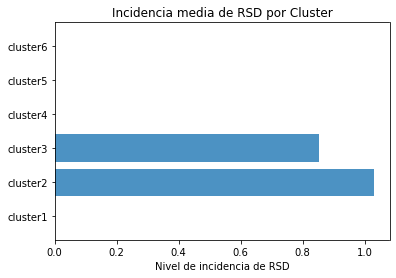

In [12]:
x1_c1 = cluster_x1['incidencia_RSD'][-1]
x1_c2 = cluster_x1['incidencia_RSD'][0]
x1_c3 = cluster_x1['incidencia_RSD'][1]
x1_c4 = cluster_x1['incidencia_RSD'][2]
x1_c5 = cluster_x1['incidencia_RSD'][3]
x1_c6 = cluster_x1['incidencia_RSD'][4]
clusters_incidencia_RSD_nombres=('cluster1','cluster2','cluster3','cluster4','cluster5','cluster6')
clusters_RSD=(x1_c1,x1_c2,x1_c3,x1_c4,x1_c5,x1_c6)
y_pos = np.arange(len(clusters_RSD))
x=np.arange(0,1,0.1)

plt.barh(y_pos, clusters_RSD, align='center', alpha=0.8)
plt.yticks(y_pos,clusters_incidencia_RSD_nombres )
plt.xlabel('Nivel de incidencia de RSD')
plt.title('Incidencia media de RSD por Cluster')

Text(0.5, 1.0, 'Incidencia media de LSD por Cluster')

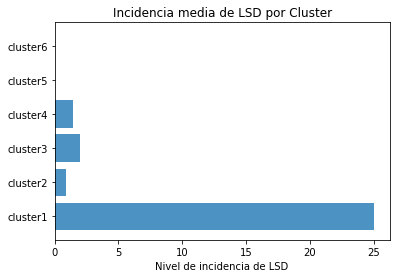

In [13]:
x2_c1 = cluster_x2['incidencia_LSD'][-1]
x2_c2 = cluster_x2['incidencia_LSD'][0]
x2_c3 = cluster_x2['incidencia_LSD'][1]
x2_c4 = cluster_x2['incidencia_LSD'][2]
x2_c5 = cluster_x2['incidencia_LSD'][3]
x2_c6 = cluster_x2['incidencia_LSD'][4]
clusters_incidencia_LSD_nombres=('cluster1','cluster2','cluster3','cluster4','cluster5','cluster6')
clusters_LSD=(x2_c1,x2_c2,x2_c3,x2_c4,x2_c5,x2_c6)
y_pos = np.arange(len(clusters_LSD))
x=np.arange(0,1,0.1)

plt.barh(y_pos, clusters_LSD, align='center', alpha=0.8)
plt.yticks(y_pos,clusters_incidencia_LSD_nombres )
plt.xlabel('Nivel de incidencia de LSD')
plt.title('Incidencia media de LSD por Cluster')

In [14]:
x1

,incidencia_RSD,longitude,latitude,area,edad,incidencia_LSD,NDVI,RH2M,PRECTOTCORR,WS2M,PAR,T2M,T2M_MAX,T2M_MIN,densidad_aparente_0-30cm_mean,intercambio_catiónico_0-30cm_mean,fraccion_gruesa_0-30cm_mean,arcillas_0-30cm_mean,nitrogeno_0-30cm_mean,ph_0-30cm_mean,arena_0-30cm_mean,limo_0-30cm_mean,carbono_organico_0-30cm_mean,cluster
0,0.0,-76.38,3.24,4.87,7.03,0.0,0.78,15.50,1.24,0.85,127.93,14.60,19.01,10.63,1.35,19.37,7.23,35.10,21.30,5.83,23.07,41.80,32.77,0
1,0.0,-76.37,3.56,4.87,7.03,0.0,0.84,16.72,1.52,0.59,127.93,15.76,19.92,12.42,1.41,22.03,4.33,39.63,22.00,5.87,20.70,39.67,33.37,0
2,0.0,-76.48,3.34,4.87,7.03,0.0,0.83,16.72,1.52,0.59,127.93,15.76,19.92,12.42,1.37,20.60,4.10,41.80,25.70,5.60,22.47,35.70,38.50,0
3,0.0,-76.31,3.40,4.87,7.03,0.0,0.80,16.72,1.52,0.59,127.93,15.76,19.92,12.42,1.41,22.90,2.50,35.63,21.96,5.93,26.60,37.77,26.30,0
4,0.0,-76.30,3.26,4.87,7.03,0.0,0.60,16.72,1.52,0.59,127.93,15.76,19.92,12.42,1.34,18.53,6.03,37.20,20.22,5.73,23.70,39.17,31.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20800,0.0,-76.53,3.17,4.87,7.00,0.0,0.74,17.08,0.68,2.44,128.15,16.80,22.15,12.51,1.31,19.10,2.90,39.97,21.52,5.47,25.33,34.70,37.57,0
20801,0.0,-76.29,3.37,1.83,5.90,0.0,0.62,16.01,0.12,2.55,128.15,15.90,20.90,11.80,1.37,19.13,4.40,34.20,18.56,5.70,27.73,38.07,29.13,0
20802,0.0,-76.29,3.37,2.38,6.40,0.0,0.62,19.26,2.52,1.16,128.15,19.08,23.98,14.90,1.37,19.13,4.40,34.20,18.56,5.70,27.73,38.07,29.13,0
20803,0.0,-76.33,3.28,4.87,7.00,0.0,0.52,17.08,0.68,2.44,128.15,16.80,22.15,12.51,1.36,20.00,3.63,38.33,20.42,5.67,27.00,34.63,27.47,0


In [15]:
df_drop=x1.drop(labels=['incidencia_RSD', 'incidencia_LSD'],axis=1)
df_drop.head()

,longitude,latitude,area,edad,NDVI,RH2M,PRECTOTCORR,WS2M,PAR,T2M,T2M_MAX,T2M_MIN,densidad_aparente_0-30cm_mean,intercambio_catiónico_0-30cm_mean,fraccion_gruesa_0-30cm_mean,arcillas_0-30cm_mean,nitrogeno_0-30cm_mean,ph_0-30cm_mean,arena_0-30cm_mean,limo_0-30cm_mean,carbono_organico_0-30cm_mean,cluster
0,-76.38,3.24,4.87,7.03,0.78,15.50,1.24,0.85,127.93,14.60,19.01,10.63,1.35,19.37,7.23,35.10,21.30,5.83,23.07,41.80,32.77,0
1,-76.37,3.56,4.87,7.03,0.84,16.72,1.52,0.59,127.93,15.76,19.92,12.42,1.41,22.03,4.33,39.63,22.00,5.87,20.70,39.67,33.37,0
2,-76.48,3.34,4.87,7.03,0.83,16.72,1.52,0.59,127.93,15.76,19.92,12.42,1.37,20.60,4.10,41.80,25.70,5.60,22.47,35.70,38.50,0
3,-76.31,3.40,4.87,7.03,0.80,16.72,1.52,0.59,127.93,15.76,19.92,12.42,1.41,22.90,2.50,35.63,21.96,5.93,26.60,37.77,26.30,0
4,-76.30,3.26,4.87,7.03,0.60,16.72,1.52,0.59,127.93,15.76,19.92,12.42,1.34,18.53,6.03,37.20,20.22,5.73,23.70,39.17,31.67,0


In [16]:
cols = df_drop.columns.tolist()
cols

['longitude',
 'latitude',
 'area',
 'edad',
 'NDVI',
 'RH2M',
 'PRECTOTCORR',
 'WS2M',
 'PAR',
 'T2M',
 'T2M_MAX',
 'T2M_MIN',
 'densidad_aparente_0-30cm_mean',
 'intercambio_catiónico_0-30cm_mean',
 'fraccion_gruesa_0-30cm_mean',
 'arcillas_0-30cm_mean',
 'nitrogeno_0-30cm_mean',
 'ph_0-30cm_mean',
 'arena_0-30cm_mean',
 'limo_0-30cm_mean',
 'carbono_organico_0-30cm_mean',
 'cluster']

In [17]:
cols.insert(0, cols.pop(cols.index('cluster')))
df_drop = df_drop.reindex(columns= cols)

In [18]:
cols

['cluster',
 'longitude',
 'latitude',
 'area',
 'edad',
 'NDVI',
 'RH2M',
 'PRECTOTCORR',
 'WS2M',
 'PAR',
 'T2M',
 'T2M_MAX',
 'T2M_MIN',
 'densidad_aparente_0-30cm_mean',
 'intercambio_catiónico_0-30cm_mean',
 'fraccion_gruesa_0-30cm_mean',
 'arcillas_0-30cm_mean',
 'nitrogeno_0-30cm_mean',
 'ph_0-30cm_mean',
 'arena_0-30cm_mean',
 'limo_0-30cm_mean',
 'carbono_organico_0-30cm_mean']

In [19]:
len(cols)

22

In [20]:
X = df_drop.iloc[:,1:30].values
y = df_drop.iloc[:,0].values
X

array([[-76.38,   3.24,   4.87, ...,  23.07,  41.8 ,  32.77],
       [-76.37,   3.56,   4.87, ...,  20.7 ,  39.67,  33.37],
       [-76.48,   3.34,   4.87, ...,  22.47,  35.7 ,  38.5 ],
       ...,
       [-76.29,   3.37,   2.38, ...,  27.73,  38.07,  29.13],
       [-76.33,   3.28,   4.87, ...,  27.  ,  34.63,  27.47],
       [-76.3 ,   3.37,   2.38, ...,  29.  ,  34.17,  29.67]])

In [21]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
np.shape(X)

(20805, 21)

In [23]:
np.shape(y)

(20805,)

In [24]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [25]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00004807  0.83777223  0.09318947  0.00044251  0.03939003  0.02073513
   0.00902771 -0.01262288 -0.01456433  0.02980297  0.01112108  0.03796682
  -0.50834975 -0.22531382  0.33718637 -0.07096782  0.32775622 -0.19171448
   0.4009857  -0.35724254  0.28597992]
 [ 0.83777223  1.00004807  0.08824086 -0.00113555  0.0224402   0.0513555
   0.00826182 -0.01406282 -0.02052904  0.05950324  0.04209623  0.06118195
  -0.35037954 -0.16762985  0.25665011 -0.15793421  0.28842756 -0.27652498
   0.42634043 -0.3223553   0.3948993 ]
 [ 0.09318947  0.08824086  1.00004807  0.10745636  0.00042918  0.00999409
  -0.00847614 -0.00184259 -0.04396421  0.01621307 -0.01498735  0.04427263
  -0.11906268  0.00560891  0.13103513 -0.05785197  0.09851333 -0.04980935
   0.0512686  -0.01156     0.07808585]
 [ 0.00044251 -0.00113555  0.10745636  1.00004807  0.0251479   0.01112218
   0.01250085 -0.08398408 -0.03111425  0.01604166 -0.01068729  0.04352103
  -0.02624702  0.01368379  0.05032285 -0.0357925   

In [26]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00004807  0.83777223  0.09318947  0.00044251  0.03939003  0.02073513
   0.00902771 -0.01262288 -0.01456433  0.02980297  0.01112108  0.03796682
  -0.50834975 -0.22531382  0.33718637 -0.07096782  0.32775622 -0.19171448
   0.4009857  -0.35724254  0.28597992]
 [ 0.83777223  1.00004807  0.08824086 -0.00113555  0.0224402   0.0513555
   0.00826182 -0.01406282 -0.02052904  0.05950324  0.04209623  0.06118195
  -0.35037954 -0.16762985  0.25665011 -0.15793421  0.28842756 -0.27652498
   0.42634043 -0.3223553   0.3948993 ]
 [ 0.09318947  0.08824086  1.00004807  0.10745636  0.00042918  0.00999409
  -0.00847614 -0.00184259 -0.04396421  0.01621307 -0.01498735  0.04427263
  -0.11906268  0.00560891  0.13103513 -0.05785197  0.09851333 -0.04980935
   0.0512686  -0.01156     0.07808585]
 [ 0.00044251 -0.00113555  0.10745636  1.00004807  0.0251479   0.01112218
   0.01250085 -0.08398408 -0.03111425  0.01604166 -0.01068729  0.04352103
  -0.02624702  0.01368379  0.05032285 -0.035

<AxesSubplot:>

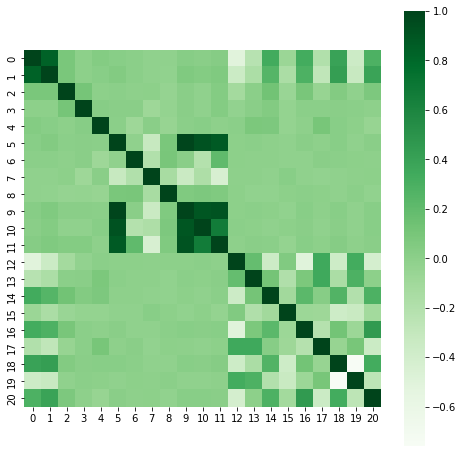

In [27]:
plt.figure(figsize=(8,8))
sns.heatmap(cov_mat, vmax=1, square=True,annot=False,cmap='Greens')

In [28]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.2679409  -0.30498199  0.00361315 -0.0624416  -0.00642094  0.689314
  -0.00104316  0.00562989 -0.00164441 -0.00801459  0.11887702  0.05756935
   0.03180373  0.14883378  0.3995215   0.06594449  0.17931887 -0.32827937
  -0.08301589 -0.06779373 -0.00127902]
 [-0.27280618 -0.28500762 -0.02031825 -0.04151193 -0.00716873 -0.65700009
   0.00081855 -0.001306   -0.00221838  0.01932176 -0.0455466   0.01502501
   0.11475706  0.26202645  0.33018012  0.07820724  0.11765652 -0.27587518
   0.1926683  -0.28910633 -0.01462706]
 [-0.06103632 -0.0613756  -0.16339798  0.09607145 -0.0107235   0.00715196
   0.00002063  0.00040907  0.00047376  0.0462245   0.01353064 -0.00697308
  -0.52799658  0.20103791 -0.14854098 -0.07639537  0.66698202  0.35219066
  -0.00388469 -0.18726703  0.05440064]
 [-0.02003383  0.00194893 -0.11170762 -0.02249588 -0.12351327  0.00543414
  -0.00005642  0.00204923  0.00222083  0.01273592  0.00683036 -0.02098651
  -0.63327915  0.22117656 -0.09573537 -0.32803809 -0.4705

In [29]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.8930295711828777
3.676941138375443
1.6510546306026694
1.4140895539366398
1.3360928218687629
1.1213893631499265
1.0729180567439371
0.9995568904656992
0.9350011560206276
0.9001385244102346
0.8355290052537905
0.7089073911450041
0.6902463398998213
0.6412762164380101
0.44782616480963183
0.3486007819584504
0.20049454102154993
0.10826771559824908
0.012079150594437022
0.007546352290720268
2.40554986514119e-05


In [30]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

In [31]:
var_exp

[18.537345006097123,
 17.508401927824757,
 7.861787009775112,
 6.733436120002717,
 6.362040962259016,
 5.339692681697642,
 5.108888031151138,
 4.759565935214387,
 4.452172451643526,
 4.286167899619031,
 3.9785183106853585,
 3.375587224998723,
 3.2867293474041013,
 3.0535494917147594,
 2.1324030470467457,
 1.6599239349203159,
 0.9546900198927288,
 0.5155357698598035,
 0.05751700002670328,
 0.035933283678635984,
 0.00011454448769045294]

In [51]:
var_exp[0:10]

[18.537345006097123,
 17.508401927824757,
 7.861787009775112,
 6.733436120002717,
 6.362040962259016,
 5.339692681697642,
 5.108888031151138,
 4.759565935214387,
 4.452172451643526,
 4.286167899619031]

In [52]:
sum(var_exp[0:10])

80.94949802528443

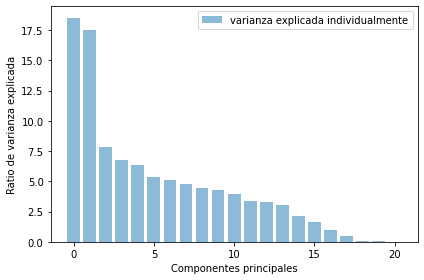

In [32]:
plt.figure(figsize=(6, 4))
plt.bar(range(21), var_exp, alpha=0.5, align='center',label='varianza explicada individualmente')
plt.ylabel('Ratio de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
plt.tight_layout()

El gráfico anterior muestra claramente que la varianza máxima (en torno al 18%) puede ser explicada por el primer componente junto al segundo. Los componentes del 1-10 explican el 80,94%  de la varianza.

Text(0, 0.5, 'Varianza explicada acumulada')

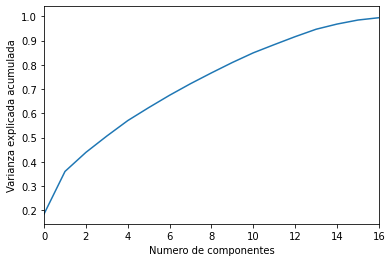

In [33]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,16,1)
plt.xlabel('Numero de componentes')
plt.ylabel('Varianza explicada acumulada')

In [34]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=21)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [35]:
# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(Y_sklearn.shape[1])]
Y_sklearn = pd.DataFrame(Y_sklearn, columns=component_names)

Y_sklearn.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
0,-2.493085,0.782010,1.290176,0.278829,-0.038053,1.338551,-1.049583,-0.282735,0.144125,-0.668936,1.011845,-1.430515,1.608989,-0.269230,1.172726,0.116231,0.141337,0.075308,-0.250096,-0.028669,0.004480
1,-2.018762,-0.618529,0.536365,0.475150,-0.266271,1.674117,-0.139296,-1.074747,0.700189,-0.567795,0.736439,-1.342345,-1.123888,-0.271216,0.726877,0.148798,-0.051999,-0.087212,-0.253561,0.047633,-0.000866
2,-1.142710,0.482116,-0.470748,1.813112,-0.374596,1.973908,1.085197,0.001429,0.574781,0.309715,1.754989,-1.351100,-1.498648,0.231985,1.097749,-0.713726,-0.078467,-0.246761,-0.247181,0.042984,0.002822
3,-2.000758,-0.655125,0.836733,-1.043215,0.061549,0.895707,-1.461538,-0.353072,0.413825,-0.509481,0.981446,-1.399717,-1.459522,1.273379,-0.343321,-0.365948,-0.014622,0.451823,-0.251328,0.042663,-0.000190
4,-1.384230,0.206954,-0.421406,0.400780,0.426376,1.373151,-1.333519,0.491917,0.444015,-1.119535,0.164047,-1.636507,1.304816,-0.125102,0.578649,0.408438,-0.073116,0.428907,-0.255860,0.041773,-0.012021


### Envolviendo las cargas

In [36]:
columnas_ = df_drop.iloc[:,1:30].columns

In [37]:
columnas_

Index(['longitude', 'latitude', 'area', 'edad', 'NDVI', 'RH2M', 'PRECTOTCORR',
       'WS2M', 'PAR', 'T2M', 'T2M_MAX', 'T2M_MIN',
       'densidad_aparente_0-30cm_mean', 'intercambio_catiónico_0-30cm_mean',
       'fraccion_gruesa_0-30cm_mean', 'arcillas_0-30cm_mean',
       'nitrogeno_0-30cm_mean', 'ph_0-30cm_mean', 'arena_0-30cm_mean',
       'limo_0-30cm_mean', 'carbono_organico_0-30cm_mean'],
      dtype='object')

In [38]:
sklearn_pca.singular_values_

array([284.58845233, 276.57744565, 185.33359257, 171.51885925,
       166.7215495 , 152.73959641, 149.40209922, 144.20395816,
       139.46958109, 136.84473633, 131.84212311, 121.44179415,
       119.83273699, 115.50372464,  96.52240948,  85.16038203,
        64.5839642 ,  47.45947277,  15.85227583,  12.52973715,
         0.70742533])

In [39]:
loadings = pd.DataFrame(
    sklearn_pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=df_drop.iloc[:,1:30].columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
longitude,0.267941,0.304982,-0.003613,-0.062442,0.006421,-0.031804,-0.148834,-0.399521,0.065944,-0.179319,-0.328279,0.001279,-0.067794,0.083016,-0.057569,0.118877,-0.008015,0.689314,-0.005630,0.001644,0.001043
latitude,0.272806,0.285008,0.020318,-0.041512,0.007169,-0.114757,-0.262026,-0.330180,0.078207,-0.117657,-0.275875,0.014627,-0.289106,-0.192668,-0.015025,-0.045547,0.019322,-0.657000,0.001306,0.002218,-0.000819
area,0.061036,0.061376,0.163398,0.096071,0.010723,0.527997,-0.201038,0.148541,-0.076395,-0.666982,0.352191,-0.054401,-0.187267,0.003885,0.006973,0.013531,0.046224,0.007152,-0.000409,-0.000474,-0.000021
edad,0.020034,-0.001949,0.111708,-0.022496,0.123513,0.633279,-0.221177,0.095735,-0.328038,0.470575,-0.354777,0.226541,-0.072819,-0.000360,0.020987,0.006830,0.012736,0.005434,-0.002049,-0.002221,0.000056
NDVI,0.003260,-0.002368,0.169415,-0.223610,-0.250793,0.167598,0.122814,-0.632160,-0.096856,0.277970,0.560674,0.086312,-0.060274,-0.046194,0.035575,0.006564,0.006973,0.000601,0.001658,0.002126,-0.000132
RH2M,0.382528,-0.330516,-0.016231,0.008861,-0.092613,-0.016638,-0.004172,0.027080,0.007539,-0.016391,-0.002296,0.093639,0.018827,0.008501,0.004581,0.001059,0.053358,0.001352,-0.787777,0.318583,0.000275
PRECTOTCORR,0.014401,-0.013211,-0.006528,-0.020907,0.689195,0.013572,0.055917,-0.090272,0.381052,0.000066,0.172267,0.491109,0.032194,0.004848,0.026671,-0.009389,0.307415,0.007069,0.013336,0.005672,-0.000187
WS2M,-0.167351,0.149709,-0.026848,0.030816,-0.462322,-0.114694,-0.075006,0.124479,0.014596,-0.156550,-0.029325,0.798552,0.038636,0.039997,0.040529,-0.007467,-0.178252,0.000488,0.003303,-0.007131,0.000009
PAR,0.036857,-0.051843,-0.055214,0.028203,0.328852,-0.272621,0.229088,-0.118023,-0.807408,-0.222061,0.006354,0.168427,-0.062646,-0.067465,-0.004706,0.007096,-0.068080,-0.001876,0.004931,-0.019869,0.000144
T2M,0.386559,-0.329368,-0.009697,0.005811,-0.067556,-0.000249,-0.009588,0.020132,0.047605,-0.008153,0.002761,0.077746,0.018395,0.008405,0.003337,0.003616,-0.044182,0.002607,-0.002333,-0.852125,0.000256


In [53]:
loadings.to_excel('loadings_pca.xlsx', index = True)